## ***Lemmatization***

## ***Import the Libraries***

In [0]:
import pandas as pd
import numpy as np

In [85]:
from google.colab import files
uploaded = files.upload()

Saving twitter_train.csv to twitter_train (1).csv


## ***Import the Dataset***

In [86]:
twitter=pd.read_csv('twitter_train.csv')
twitter.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [87]:
twitter.shape

(7920, 2)

In [88]:
twitter['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [89]:
twitter.isnull().sum()

label    0
tweet    0
dtype: int64

## ***Lemmatization***

In [90]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
corpus=[]
for i in range(0,7920):
  review=re.sub('[^a-zA-Z]',' ',twitter['tweet'][i])
  review=review.lower()
  review=review.split()
  lemmatizer = WordNetLemmatizer()
  review=[lemmatizer.lemmatize(word)for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

## ***Visualising the Corpus***

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

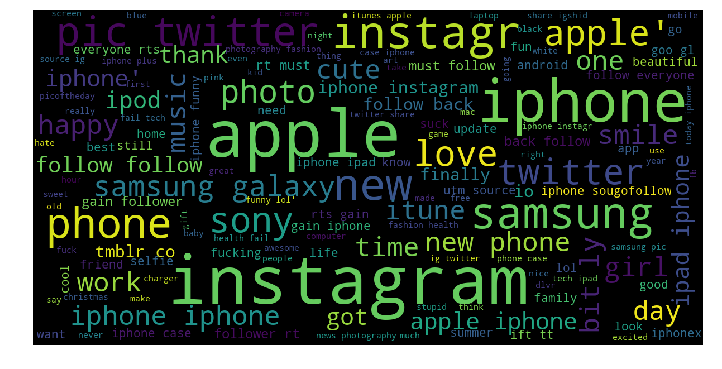

In [93]:
show_wordcloud(corpus)